In [1]:

import sys
assert sys.version_info >= (3, 5)


In [4]:
import sklearn
assert sklearn.__version__ >= "0.20"
import numpy as np
import os
import tarfile
import urllib
import pandas as pd

In [5]:
data = pd.read_csv("supermarket_sales - Sheet1.csv")

In [6]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [10]:
corr_matrix = data.corr() # computes the standard correlation coefficient (Pearson’s r) between every pair of attributes
corr_matrix

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000


In [12]:
null_values = data.isnull().sum()
null_values 

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [13]:
numerical_columns = ['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross margin percentage', 'gross income', 'Rating']
numerical_data = data[numerical_columns]

# Calculate descriptive statistics
descriptive_stats = numerical_data.describe()
print(descriptive_stats)

        Unit price     Quantity       Tax 5%        Total        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.672130     5.510000    15.379369   322.966749   307.58738   
std      26.494628     2.923431    11.708825   245.885335   234.17651   
min      10.080000     1.000000     0.508500    10.678500    10.17000   
25%      32.875000     3.000000     5.924875   124.422375   118.49750   
50%      55.230000     5.000000    12.088000   253.848000   241.76000   
75%      77.935000     8.000000    22.445250   471.350250   448.90500   
max      99.960000    10.000000    49.650000  1042.650000   993.00000   

       gross margin percentage  gross income      Rating  
count             1.000000e+03   1000.000000  1000.00000  
mean              4.761905e+00     15.379369     6.97270  
std               6.131498e-14     11.708825     1.71858  
min               4.761905e+00      0.508500     4.00000  
25%               4.761905e+00      5.924875   

# Branch Analysis

## Branch Sales

Branch
A    106200.3705
B    106197.6720
C    110568.7065
Name: Total, dtype: float64


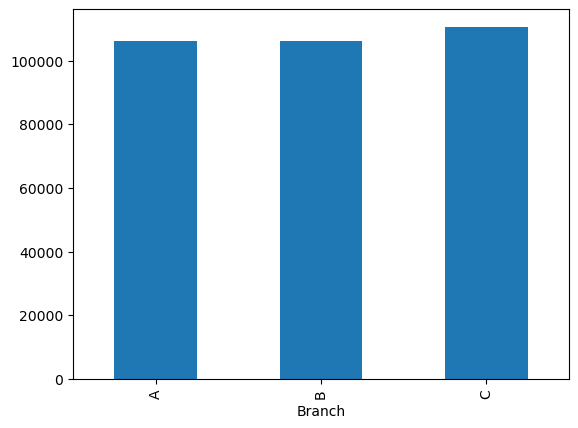

In [17]:
# Calculate total sales for each branch
branch_sales = data.groupby('Branch')['Total'].sum()
branch_sales
# Visualize branch-wise sales using a bar plot
branch_sales.plot(kind='bar')
print(branch_sales)

## Sales per location

City
Mandalay     106197.6720
Naypyitaw    110568.7065
Yangon       106200.3705
Name: Total, dtype: float64


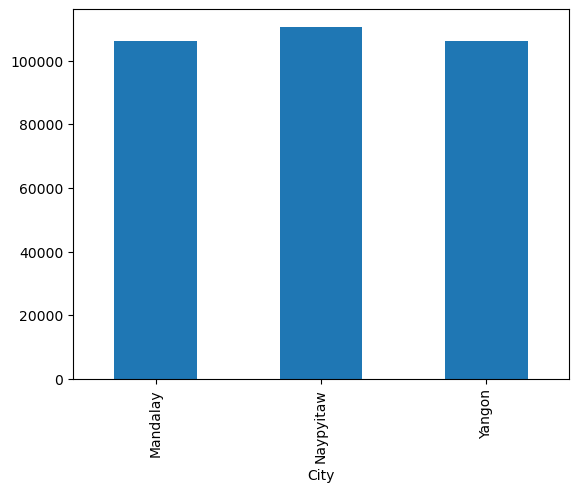

In [18]:
# Calculate total sales for each city
city_sales = data.groupby('City')['Total'].sum()

# Visualize city-wise sales using a bar plot
city_sales.plot(kind='bar')
print(city_sales)

## Customer Type analysis

Customer type
Member    164223.444
Normal    158743.305
Name: Total, dtype: float64


<AxesSubplot:ylabel='Total'>

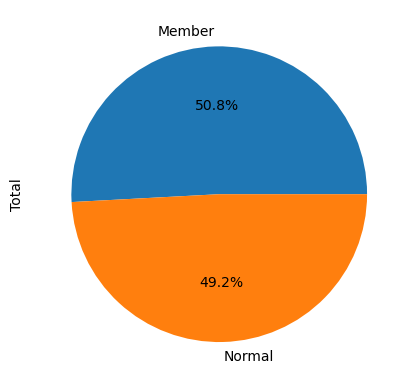

In [19]:
# Calculate total sales for each customer type
customer_type_sales = data.groupby('Customer type')['Total'].sum()
print(customer_type_sales)
# Visualize customer type sales using a pie chart
customer_type_sales.plot(kind='pie', autopct='%1.1f%%')

## Product line analysis 

Product line
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Food and beverages        56144.8440
Health and beauty         49193.7390
Home and lifestyle        53861.9130
Sports and travel         55122.8265
Name: Total, dtype: float64


<AxesSubplot:xlabel='Product line'>

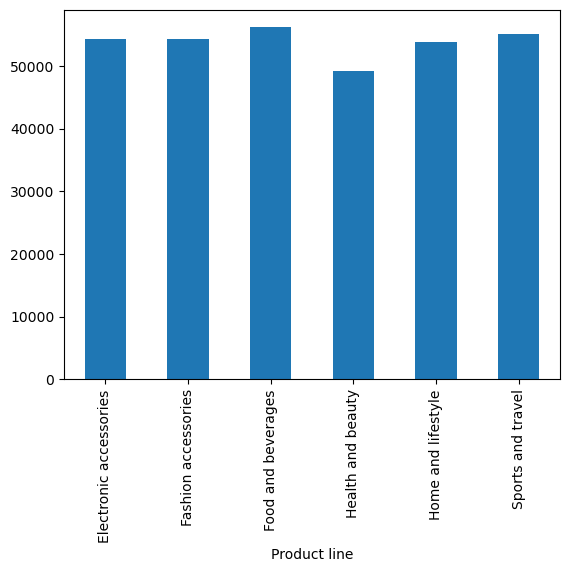

In [20]:
# Calculate total sales for each product line
product_line_sales = data.groupby('Product line')['Total'].sum()
print(product_line_sales)
# Visualize product line sales using a bar plot
product_line_sales.plot(kind='bar')

## Time based analysis

Datetime
2019-03-09    7474.0470
2019-02-07    7228.2105
2019-03-14    7214.6340
2019-02-15    6830.7855
2019-03-02    6560.3055
Name: Total, dtype: float64


<AxesSubplot:xlabel='Datetime'>

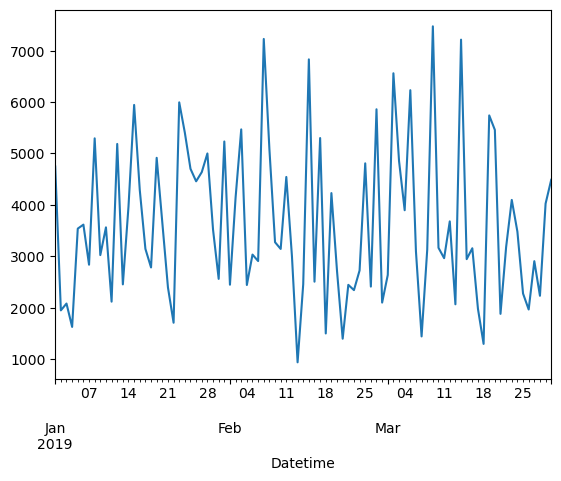

In [28]:
# Convert 'Date' and 'Time' columns to datetime data type
data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])

# Set the 'Datetime' column as the DataFrame index
data.set_index('Datetime', inplace=True)

# Calculate daily sales
# Assuming you have already calculated daily_sales
daily_sales = data.resample('D')['Total'].sum()

# Sort the daily_sales in ascending order
sorted_sales = daily_sales.sort_values(ascending=False)

# Get the best sales days (highest sales)
best_sales_days = sorted_sales.head(5)  # Change the number to get the desired top days

print(best_sales_days)
# Visualize sales trends over time using a line plot
daily_sales.plot(kind='line')

In [30]:
daily_sales_stats = daily_sales.describe()
print(daily_sales_stats)

count      89.000000
mean     3628.839876
std      1527.639602
min       934.237500
25%      2444.536500
50%      3163.230000
75%      4745.181000
max      7474.047000
Name: Total, dtype: float64


## Gender based analysis 

Gender
Female    167882.925
Male      155083.824
Name: Total, dtype: float64


<AxesSubplot:xlabel='Gender'>

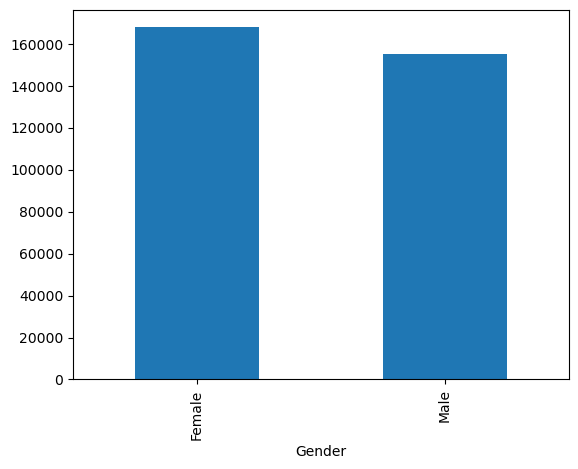

In [31]:
# Calculate total sales for each gender
gender_sales = data.groupby('Gender')['Total'].sum()
print(gender_sales)
# Visualize gender-based sales using a bar plot
gender_sales.plot(kind='bar')

## Payment analysis 

<AxesSubplot:ylabel='Total'>

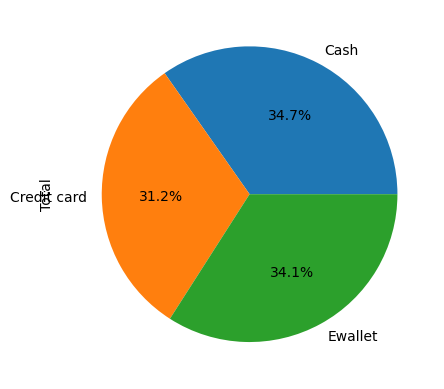

In [32]:
# Calculate total sales for each payment method
payment_sales = data.groupby('Payment')['Total'].sum()

# Visualize payment methods and their corresponding sales using a pie chart
payment_sales.plot(kind='pie', autopct='%1.1f%%')

## Rating analysis 

6.972700000000003


<AxesSubplot:ylabel='Frequency'>

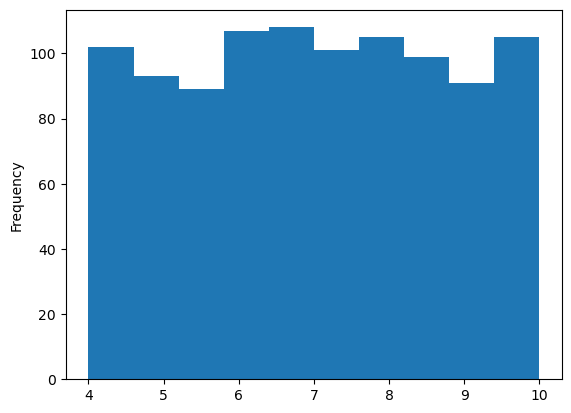

In [36]:
# Calculate average rating
average_rating = data['Rating'].mean()
print(average_rating)
# Visualize the distribution of ratings using a histogram
data['Rating'].plot(kind='hist', bins=10)

# Looking for problems in rating that could lead to Customer Churn

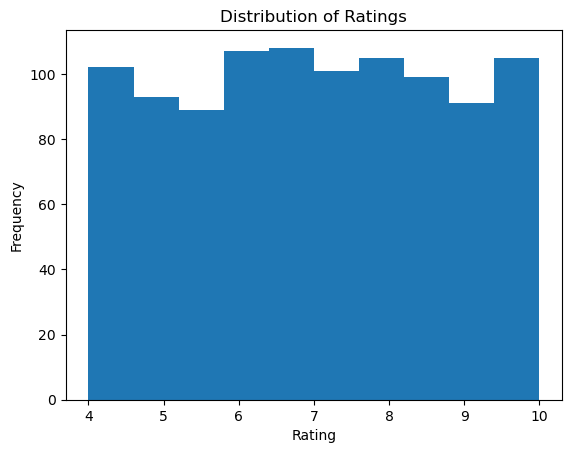

Median:7.0
Mode:6.0
0.25    5.5
0.50    7.0
0.75    8.5
Name: Rating, dtype: float64


In [43]:
import matplotlib.pyplot as plt

# Visualize the distribution of ratings using a histogram
data['Rating'].plot(kind='hist', bins=10)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

# Calculate additional descriptive statistics
median_rating = data['Rating'].median()
mode_rating = data['Rating'].mode().values[0]
quartiles = data['Rating'].quantile([0.25, 0.5, 0.75])
print("Median:" + str(median_rating))
print("Mode:" + str(mode_rating))
print(quartiles)

## Rating Analysis by Branch or City

In [45]:
# Analyze the average ratings by branch
branch_ratings = data.groupby('Branch')['Rating'].describe()
print(branch_ratings)
# Analyze the average ratings by city
city_ratings = data.groupby('City')['Rating'].describe()
print(city_ratings)

        count      mean       std  min  25%  50%  75%   max
Branch                                                     
A       340.0  7.027059  1.731345  4.0  5.6  7.1  8.5  10.0
B       332.0  6.818072  1.713719  4.0  5.3  6.7  8.2  10.0
C       328.0  7.072866  1.704526  4.0  5.6  7.1  8.5  10.0
           count      mean       std  min  25%  50%  75%   max
City                                                          
Mandalay   332.0  6.818072  1.713719  4.0  5.3  6.7  8.2  10.0
Naypyitaw  328.0  7.072866  1.704526  4.0  5.6  7.1  8.5  10.0
Yangon     340.0  7.027059  1.731345  4.0  5.6  7.1  8.5  10.0


## Correlation analysis 

In [47]:
# Calculate the correlation between ratings and other numerical columns
correlation_matrix = data.corr()
rating_correlations = correlation_matrix['Rating']
rating_correlations

Unit price                -0.008778
Quantity                  -0.015815
Tax 5%                    -0.036442
Total                     -0.036442
cogs                      -0.036442
gross margin percentage         NaN
gross income              -0.036442
Rating                     1.000000
Name: Rating, dtype: float64

## Time-based analysis

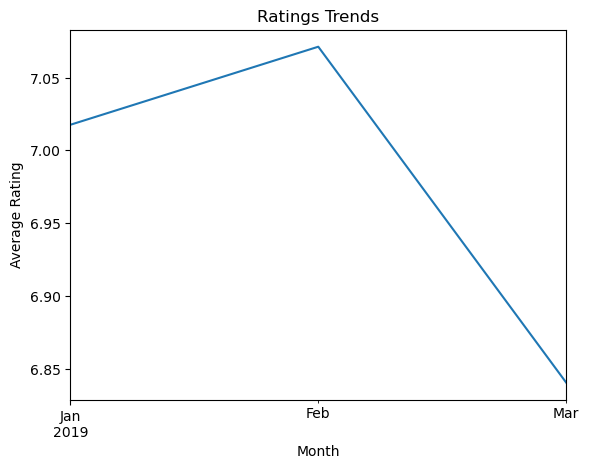

In [48]:
# Convert 'Date' column to datetime data type
data['Date'] = pd.to_datetime(data['Date'])

# Analyze the average ratings by month
monthly_ratings = data.resample('M', on='Date')['Rating'].mean()

# Visualize the ratings trends over time using a line plot
monthly_ratings.plot(kind='line')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.title('Ratings Trends')
plt.show()

## Gender based analysis 

In [49]:
# Analyze the average ratings by gender
gender_ratings = data.groupby('Gender')['Rating'].describe()
gender_ratings

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,501.0,6.964471,1.755761,4.0,5.4,7.1,8.50,10.0
Male,499.0,6.980962,1.682146,4.0,5.6,6.9,8.45,10.0


## Customer satisfaction trends

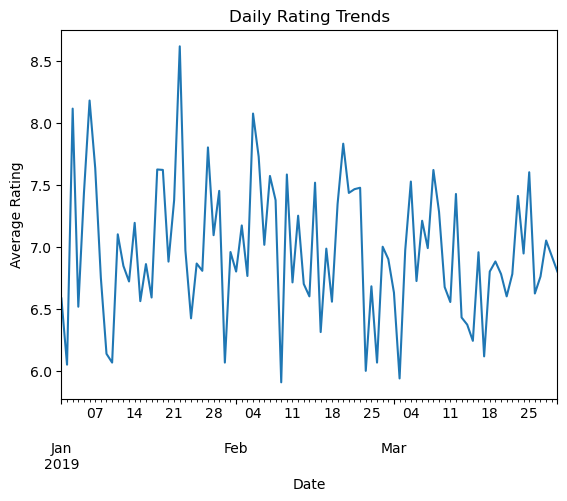

In [51]:
# Calculate the average rating for different time intervals
daily_ratings = data.resample('D', on='Date')['Rating'].mean()

# Visualize the rating trends over time using a line plot
daily_ratings.plot(kind='line')
plt.xlabel('Date')
plt.ylabel('Average Rating')
plt.title('Daily Rating Trends')
plt.show()

# Digging further

In [54]:
# Filter the data for March
march_data = data[data['Date'].dt.month == 3]

# Calculate the relevant metrics for March
march_rating_mean = march_data['Rating'].mean()
march_sales_total = march_data['Total'].sum()

# Filter the data for the other two months
other_months_data = data[data['Date'].dt.month.isin([1, 2])]  # Adjust the months as per your data

# Calculate the relevant metrics for the other two months
other_months_rating_mean = other_months_data['Rating'].mean()
other_months_sales_total = other_months_data['Total'].sum()

# Print the results
print("March Rating Mean:", march_rating_mean)
print("March Sales Total:", march_sales_total)
print("Other Months Rating Mean:", other_months_rating_mean)
print("Other Months Sales Total:", other_months_sales_total)

March Rating Mean: 6.840289855072468
March Sales Total: 109455.50700000001
Other Months Rating Mean: 7.042442748091606
Other Months Sales Total: 213511.242


In [55]:
# Filter the data for March
march_data = data[data['Date'].dt.month == 3]

# Calculate the relevant metrics for March
march_rating_mean = march_data['Rating'].mean()
march_quantity_mean = march_data['Quantity'].mean()

# Filter the data for the other two months
other_months_data = data[data['Date'].dt.month.isin([1, 2])]  # Adjust the months as per your data

# Calculate the relevant metrics for the other two months
other_months_rating_mean = other_months_data['Rating'].mean()
other_months_quantity_mean = other_months_data['Quantity'].mean()

# Print the results
print("March Rating Mean:", march_rating_mean)
print("March Quantity Mean:", march_quantity_mean)
print("Other Months Rating Mean:", other_months_rating_mean)
print("Other Months Quantity Mean:", other_months_quantity_mean)

March Rating Mean: 6.840289855072468
March Quantity Mean: 5.481159420289855
Other Months Rating Mean: 7.042442748091606
Other Months Quantity Mean: 5.525190839694656


In [57]:
# Filter the data for March
march_data = data[data['Date'].dt.month == 3]

# Calculate the total quantity purchased for March
march_quantity_total = march_data['Quantity'].sum()

# Filter the data for the other two months
other_months_data = data[data['Date'].dt.month.isin([1, 2])]  # Adjust the months as per your data

# Calculate the total quantity purchased for the other two months
other_months_quantity_total = other_months_data['Quantity'].sum()

# Print the results
print("March Quantity Total:", march_quantity_total)
print("Other Months Quantity Total:", other_months_quantity_total)

March Quantity Total: 1891
Other Months Quantity Total: 3619


In [59]:
# Group the data by month and product line and calculate the count of products purchased
product_counts_by_month = data.groupby([data['Date'].dt.month, 'Product line'])['Invoice ID'].count()

# Reshape the data to have months as columns and product lines as rows
product_counts_by_month = product_counts_by_month.unstack(level=0)

# Print the results
print("Product Counts by Month:")
print(product_counts_by_month)

Product Counts by Month:
Date                     1   2   3
Product line                      
Electronic accessories  54  54  62
Fashion accessories     64  60  54
Food and beverages      56  62  56
Health and beauty       49  46  57
Home and lifestyle      59  38  63
Sports and travel       70  43  53


# Conclusion

Conclusion:
Based on the analysis performed on the dataset, it can be concluded that there is little to no variability and a weak correlation between the variables (payment method, product line, quantity, unit price) and customer ratings. The highest correlation coefficient obtained was only 0.037, indicating a minimal linear relationship between these factors.

Therefore, further research on how to increase customer satisfaction cannot be solely determined from the provided data and requires diving deeper into other factors. It is recommended to conduct additional analyses and investigations to gain a better understanding of customer satisfaction. Here are some suggested areas for further research:

Customer Feedback Analysis: Analyze specific customer feedback and reviews, particularly focusing on the comments and themes from the month with significantly lower ratings (e.g., March). Look for recurring complaints or negative feedback that could have contributed to the lower ratings.

Sales and Product Line Analysis: Investigate the sales performance of different product lines, especially in March compared to other months. Assess whether there were any significant changes in product availability, quality, or pricing that might have impacted customer satisfaction.

Promotions or Marketing Campaigns: Assess the impact of any promotions, discounts, or marketing campaigns that ran during the period of interest. Examine whether these initiatives attracted a different customer base or led to changes in service quality or customer experience.

External Factors: Consider external factors such as local events, holidays, or changes in the overall economic environment that may have influenced customer satisfaction. Investigate if there were any disruptions or challenges that affected the store's operations or customer experience during the specific time period.

Staffing or Training Issues: Evaluate if there were any changes in staffing levels or training programs during the period of interest. Assess whether the staff was adequately trained to handle customer queries, provide assistance, or ensure a positive shopping experience.

Competitor Analysis: Research and analyze any significant developments or changes in the market or among competitors during the period. Explore if customers may have shifted their preferences to other supermarkets or stores due to better offers, service, or product availability.

By diving deeper into these points and conducting further research and analysis, a more comprehensive understanding of customer satisfaction and potential areas for improvement can be achieved.